### constructing a decision tree involves the following steps:

1) Recursive binary splitting/partitioning the data into smaller subsets

2) Selecting the best rule from a variable/ attribute for the split

3) Applying the split based on the rules obtained from the attributes

4) Repeating the process for the subsets obtained

5) Continuing the process until the stopping criterion is reached

6) Assigning the majority class/average value as the prediction

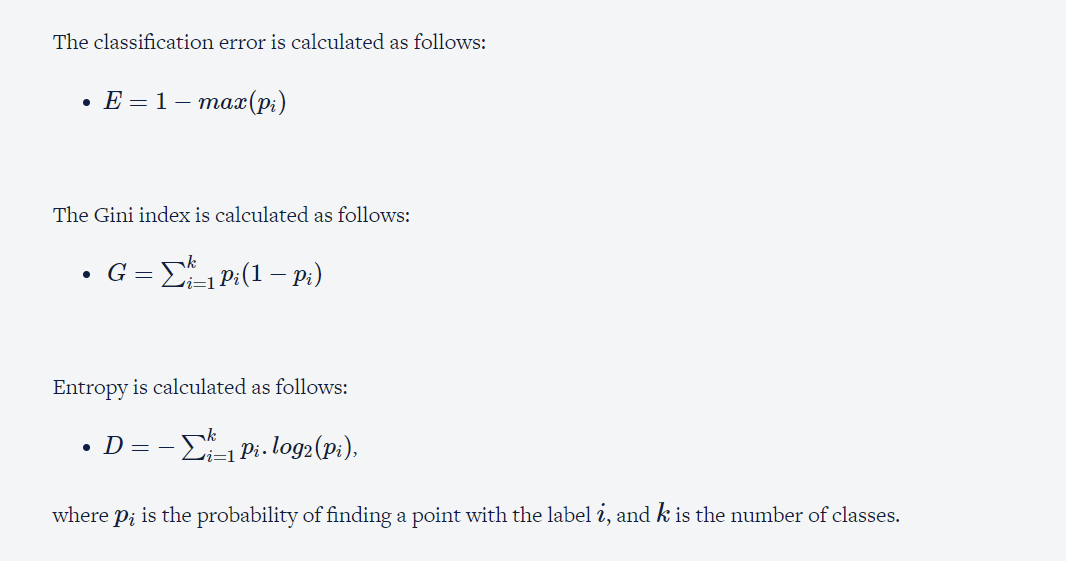

# gini impurities excerise 1

## formula of gini :- 
-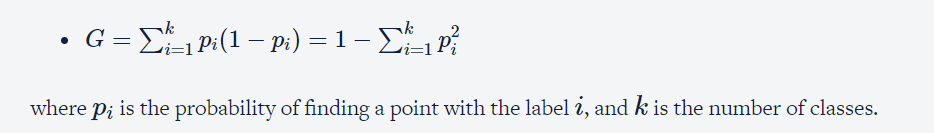


Important Terminology related to Decision Trees
 

- Root Node: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.
- Splitting: It is a process of dividing a node into two or more sub-nodes.
- Decision Node: When a sub-node splits into further sub-nodes, then it is called the decision node.
- Leaf / Terminal Node: Nodes do not split is called Leaf or Terminal node.
- Pruning: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.
- Branch / Sub-Tree: A subsection of the entire tree is called branch or sub-tree.
- Parent and Child Node: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

<br> Gini Index works with the categorical target variable “Success” or “Failure”. It performs only Binary splits.

Higher value of Gini index implies higher inequality, higher heterogeneity.

information gain is a statistical property that measures how well a given attribute separates the training examples according to their target classification

#### importing the required libraries

In [4]:
import numpy as np
import pandas as pd

#### importing the dataset

In [5]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv(r'F:\har\mldl\decision tree\heart_v2.csv')

In [6]:
# checking the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [11]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


- The data set is not homogeneous, and you need to split the data such that the resulting partitions are as homogenous as possible. 

- This is a classification problem, and there are two output classes or labels - having a heart disease or not. Here, you use the Gini index as the homogeneity measure. 

- Let's go ahead and see how Gini index can be used to decide where to make the split on the data point. 

- While making your first split, you need to choose an attribute such that the purity gain is maximum. 

- You can calculate the Gini index of the split on ‘sex’ (gender) and compare that with the Gini index of the split on ‘cholesterol’.

In [61]:
#### and also for the heart disease 0=No-disease 1=disease
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

Suppose you gave the data for 270 patients and the target variable consists of two classes: class 0 having 150  people with no heart disease and class 1 having 120 people with a heart disease.

Types of Decision Trees
 
Types of decision trees are based on the type of target variable we have. It can be of two types:

- Categorical Variable Decision Tree: Decision Tree which has a categorical target variable then it called a Categorical variable decision tree.

- Continuous Variable Decision Tree: Decision Tree has a continuous target variable then it is called Continuous Variable Decision Tree.

Example:- Let’s say we have a problem to predict whether a customer will pay his renewal premium with an insurance company (yes/ no). Here we know that the income of customers is a significant variable but the insurance company does not have income details for all customers. Now, as we know this is an important variable, then we can build a decision tree to predict customer income based on occupation, product, and various other variables. In this case, we are predicting values for the continuous variables.

#### Split will be based which as maximum homogenuty

Let's now evaluate which split gives the maximum reduction in impurity among the possible choices. You have the following information about the target variable and the two attributes.

In [165]:
# gini before split
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [166]:
# findinf the % of disease and  non disease 
df['heart disease'].value_counts()[0]

150

In [180]:
p0no_disease=np.divide(df['heart disease'].value_counts()[0],df.shape[0])
p1disease=np.divide(df['heart disease'].value_counts()[1],df.shape[0])
print(f'p0no_disease={p0no_disease}==>% of no_disease\np1disease={p0disease}==>% of p1disease')

p0no_disease=0.5555555555555556==>% of no_disease
p1disease=0.4444444444444444==>% of p1disease


In [177]:
# Gini impurity before split
# gini_impurity=p0(1-p0)+p1(1+p1)

giniimpurity_beforesplit=p0no_disease*(1-p0no_disease)+p1disease*(1-p1disease)

giniimpurity_beforesplit

0.49382716049382713

# Step 1= Recursive binary splitting/partitioning the data into smaller subsets

### step 1A now for the first select a varible then find the probablity after spliting based on the Target variable.

In [136]:
# select variable sex
#### checking for the number of male and female 0=female and 1=male

print(df['sex'].value_counts())

1    183
0     87
Name: sex, dtype: int64


In [138]:
df['sex'].value_counts()[1]

183

In [73]:
# findinf the total number of male and female with respect to heart disease
matrix=pd.pivot_table(h,index='heart disease',columns=df['sex'],aggfunc='count')
matrix

sex     
sex             0    1
heart disease         
0              67   83
1              20  100

### step1B calculating the probablity both label after  split 

- P0=(value of heart disease & a sex)/over_all male in dataset
- P1=(value of non-heart disease & a sex)/over_all male in dataset

In [146]:
# value labeled 0 will be no heart disease value labeled 1 will be haert disease;
# Now the probabilities of the two classes within the male subset comes out to be:
p0male=np.divide(matrix['sex'][1][0],df['sex'].value_counts()[1])

p1male=np.divide(matrix['sex'][1][1],df['sex'].value_counts()[1])
print('p0male={}==> probablity of male not having disease,\n p1male={}==> probablity of male having disease'.format(p0male,p1male))

p0male=0.453551912568306==> probablity of male not having disease,
 p1male=0.546448087431694==> probablity of male having disease


In [147]:
 #value labeled 0 will be no heart disease value labeled 1 will be haert disease;
# Now the probabilities of the two classes within the female subset comes out to be:
p0female=np.divide(matrix['sex'][0][0],df['sex'].value_counts()[0])

p1female=np.divide(matrix['sex'][0][1],df['sex'].value_counts()[0])
print('p0female={}==> probablity of female not having disease,\n p1female={}==> probablity of female having disease'.format(p0female,p1female))

p0female=0.7701149425287356==> probablity of female not having disease,
 p1female=0.22988505747126436==> probablity of female having disease


### step1C calculating Gini impurity for male and female 

#### Gini impurity for  formula:
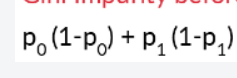

In [153]:
# gini impurity of male and female:
pmale=(p0male*(1.0-p0male))+(p1male*(1.0-p1male))
pfemale=(p0female*(1.0-p0female))+(p1female*(1.0-p1female))
print('pmale={}==>gini impurity for male.\npfemale={}==>gini impurity for female'.format(pmale,pfemale))

pmale=0.4956851503478754==>gini impurity for male.
pfemale=0.35407583564539574==>gini impurity for female


In [161]:

#findinf % of male and female in data set
pmaleoverall=np.divide(df['sex'].value_counts()[1],df.shape[0])
pfemaleoverall=np.divide(df['sex'].value_counts()[0],df.shape[0])
print(f'% of male in datset={pmaleoverall},\n% of female in datset{pfemaleoverall}')

% of male in datset=0.6777777777777778,
% of female in datset0.32222222222222224


In [163]:
#now we find the gini impurity of overall based on selected variable
giniaftersplit=pmale*pmaleoverall+pfemale*pfemaleoverall
giniaftersplit

0.4500554822770764

In [179]:
# Reduction in Gini impurity
Reduction_Gini_impurity=giniimpurity_beforesplit-giniaftersplit
Reduction_Gini_impurity

0.04377167821675071

The change in impurity or the purity gain is given by the difference of impurity post-split from impurity pre-split, i.e.,


Δ Impurity = Impurity (pre-split) – Impurity (post-split)

 

The post-split impurity is calculated by finding the weighted average of two child nodes. The split that results in maximum gain is chosen as the best split.

 

To summarise, the information gain is calculated by:

G
a
i
n
=
D
−
D
A
where 
D
 is the entropy of the parent set (data before splitting),
D
A
 is the entropy of the partitions obtained after splitting on attribute 
A
. Note that reduction in entropy implies information gain.

 

Let's understand how do we compute information gain with an example. Suppose you have four data points out of which two belong to the class label '1', and the other two belong to the class label '2'. You split the points such that the left partition has two data points belonging to label '1', and the right partition has the other two data points that belong to label '2'. Now let's assume that you split on some attribute called 'A'.

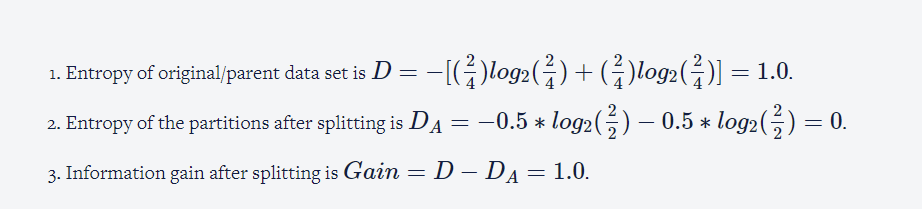